# <center><font color=navy> Machine Learning from Theory to Practice</font></center>
## <center><font color=navy>Hyperparameter Optimization (HPO)</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
 <center> habibnia@vt.edu </center> 

### Introduction to Hyperparameter Optimization (HPO)

Hyperparameters are the configuration settings that orchestrate the learning process of a neural network. These settings, which include network architecture details and learning process parameters, are set prior to training and have a substantial impact on model performance. Unlike model parameters like weights and biases that are learned during training, hyperparameters are predefined and guide the training process.

The optimization of these hyperparameters is pivotal for enhancing model accuracy, as it involves searching for the ideal combination of hyperparameters that yield the most precise predictions. This search can range from basic manual adjustments and grid-based explorations to more sophisticated and automated optimization strategies.

### Popular HPO Techniques

Hyperparameter optimization employs a variety of techniques, each with its own approach to navigating the vast hyperparameter space:

- **Grid Search**: This method evaluates the model's performance for every possible combination of hyperparameters defined within a grid, offering a thorough but time-consuming approach.
- **Random Search**: By randomly sampling the hyperparameter space, this technique provides a quicker, though less exhaustive, alternative to grid search.
- **Bayesian Optimization**: Utilizing a probabilistic model, Bayesian Optimization predicts the performance of different hyperparameter sets and intelligently selects new combinations based on past evaluations.
- **Gradient-Based Optimization**: This approach adjusts hyperparameters by following the gradient of the objective function, suitable for continuous and differentiable hyperparameters.
- **Evolutionary Algorithms**: Mimicking natural selection, these algorithms evolve hyperparameters through generations using mechanisms like mutation and crossover, effectively exploring complex spaces.

### Automated Hyperparameter Tuning

Among the aforementioned techniques, certain methods stand out for their ability to automate the optimization process, reducing the need for manual intervention and expertise:

- **Automated HPO Frameworks**: Advanced tools such as Hyperopt, Optuna, and comprehensive AutoML solutions like Google's AutoML and H2O's AutoML streamline hyperparameter tuning. These frameworks often leverage sophisticated strategies, including Bayesian Optimization and Evolutionary Algorithms, to autonomously search for optimal hyperparameters.
  
- **Bayesian Optimization** and **Evolutionary Algorithms**, in particular, are celebrated for their efficiency in automated settings. They intelligently navigate the hyperparameter space, potentially uncovering high-performance configurations that might be missed through more rudimentary approaches.

### Types of Hyperparameters in Deep Learning

Deep learning models are influenced by various hyperparameters, including but not limited to:

- **Network Architecture**: Details like the number of layers and the number of units in each layer, which define the structure of the neural network.
- **Learning Rate**: The magnitude of updates to the model in response to the estimated error each time the model weights are updated.
- **Number of Epochs**: Total rounds of passing the entire dataset through the neural network during training.
- **Batch Size**: The number of examples used in one iteration of model training.
- **Regularization Parameters**: Techniques such as L1 and L2 regularization that mitigate overfitting by penalizing large weights.

The selection of hyperparameters is a crucial aspect of neural network design and can dramatically affect learning dynamics and model performance. Given the diversity in neural network architectures and the unique challenges posed by different datasets, hyperparameter optimization remains a key step in developing efficient and accurate neural network models.

### Grid Search

Grid Search involves defining a grid of hyperparameters and systematically working through multiple combinations, evaluating each one. The key steps are:

1. **Define the hyperparameter grid:** Create a dictionary where each key represents a hyperparameter and its corresponding value is a list of possible values to explore.
2. **Create a model:** Train a model for each combination of hyperparameters in the grid (e.g., SVM, Neural Network).
3. **Instantiate the GridSearchCV object:** Provide the model and the hyperparameter grid to the `GridSearchCV` function from the `sklearn.model_selection` module.
4. **Fit the model:** Apply the `fit` method to the `GridSearchCV` object, passing your training data (features `X` and labels `y`).
5. **Retrieve results:** Access the best combination of hyperparameters using `best_params_` and the best score with `best_score_`.

While comprehensive, it can be computationally expensive for large grids or numerous hyperparameters.

### Grid Search with MLPRegressor

Here, we demonstrate using Grid Search to optimize hyperparameters for a Multi-Layer Perceptron Regressor (MLPRegressor) on a sinusoidal data set. We'll explore various combinations of hidden layer sizes, activation functions, and solvers to find the configuration that yields the best performance.


Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (4, 8), 'solver': 'lbfgs'}
Best score: 0.42599703102184777


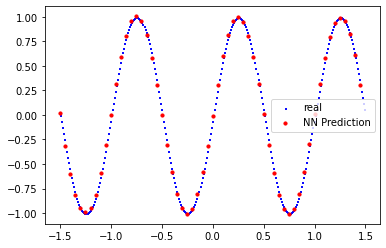

In [2]:
%matplotlib inline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-1.5, 1.5, 0.01).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

# Define hyperparameter grid
param_grid = {
   'hidden_layer_sizes': [(4, 8), (8, 4), (10, 6), (6, 10)],
   'activation': ['tanh', 'relu'],
   'solver': ['lbfgs', 'adam']
}

# Create model
nn = MLPRegressor(
   max_iter=5000, 
   random_state=9
)

# Perform grid search
grid_search = GridSearchCV(nn, param_grid, cv=5)
grid_search.fit(x, y)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

# Use the best model for prediction
best_model = grid_search.best_estimator_
test_x = np.arange(-1.5, 1.5, 0.05).reshape(-1, 1)
test_y = best_model.predict(test_x)

# Plot results
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x, test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.legend()
plt.show()

### Grid Search with Keras Neural Network

This example demonstrates using Grid Search to optimize hyperparameters for a custom-built neural network model with Keras on a sinusoidal data set. We'll explore various combinations of hidden layer sizes, activation functions, and optimizers to find the configuration that yields the best performance.

---- 

`tqdm` is a fast, extensible progress bar library for Python that can be easily integrated into loops and command-line interfaces. It provides a simple way to add progress indicators to your applications.

https://pypi.org/project/tqdm/


#### Key Features:
- Easy integration with loops and iterable objects.
- Customizable appearance and functionality.
- Support for nested loops and parallel processing.

#### Usage with Keras:
- `tqdm.keras.TqdmCallback`: A callback for Keras models that displays a tqdm progress bar for training epochs.
- Simply add `TqdmCallback(verbose=2)` to the list of callbacks in the model's `fit` method to display a progress bar during training.
- The `verbose=2` parameter ensures that tqdm's progress bar is used instead of Keras' default progress output.

#### Usage Example:
```python
from tqdm.keras import TqdmCallback

model.fit(X, y, epochs=100, callbacks=[TqdmCallback(verbose=2)])


In [ ]:
!pip install tensorflow-probability>null

Fitting 5 folds for each of 16 candidates, totalling 80 fits


0epoch [00:00, ?epoch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (8, 4), 'optimizer': 'SGD'}
Best score: -0.9068428092342227
2/2 [==============================] - 0s 6ms/step


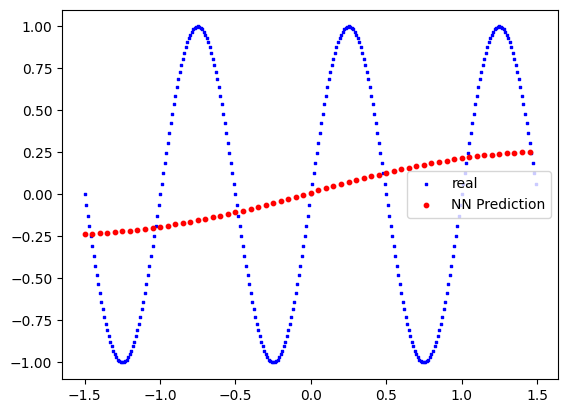

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from tqdm.keras import TqdmCallback

class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, hidden_layer_sizes=(4, 8), activation='relu', optimizer='adam', epochs=10, batch_size=10):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.optimizer = optimizer
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_layer_sizes[0], input_dim=1, activation=self.activation))
        for layer_size in self.hidden_layer_sizes[1:]:
            model.add(Dense(layer_size, activation=self.activation))
        model.add(Dense(1))  # Output layer
        model.compile(loss='mean_squared_error', optimizer=self.optimizer)
        return model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0, callbacks=[TqdmCallback(verbose=2)])
        return self

    def predict(self, X):
        return self.model.predict(X)

x = np.arange(-1.5, 1.5, 0.01).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

param_grid = {
    'hidden_layer_sizes': [(4, 8), (8, 4), (10, 6), (6, 10)],
    'activation': ['tanh', 'relu'],
    'optimizer': ['adam','SGD']
}

model = KerasRegressorWrapper()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

test_x = np.arange(-1.5, 1.5, 0.05).reshape(-1, 1)
test_y = grid_search.predict(test_x)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x, test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.legend()
plt.show()


`KerasRegressorWrapper` is a custom class designed to integrate Keras models with scikit-learn's `GridSearchCV`. This wrapper allows you to perform hyperparameter tuning on Keras models using scikit-learn's grid search functionality.

#### Key Components:
- **`__init__` Method**: Initializes the wrapper with given hyperparameters such as the architecture (`hidden_layer_sizes`), activation function (`activation`), optimizer (`optimizer`), and number of epochs (`epochs`).
- **`build_model` Method**: Constructs a Keras Sequential model based on the specified architecture and activation function.
- **`fit` Method**: Trains the model. If the optimizer is 'adam', it uses Keras' built-in compile and fit methods. If 'lbfgs' is specified, it employs TensorFlow Probability's L-BFGS optimizer with a custom training loop.
- **`predict` Method**: Uses the trained model to make predictions on new data.
- **`score` Method**: Evaluates the model's performance, returning the negative mean squared error for compatibility with scikit-learn's convention where higher values are better.

#### Usage:
To use `KerasRegressorWrapper` with `GridSearchCV`, define a parameter grid (`param_grid`) that includes the hyperparameters you want to tune. Then, create a `GridSearchCV` instance with `KerasRegressorWrapper` as the estimator and `param_grid` as the hyperparameter space. Finally, call the `fit` method on your data.

----

https://www.tensorflow.org/probability

TensorFlow Probability (`tfp`) is a library for probabilistic reasoning and statistical analysis in TensorFlow. It provides a range of tools for building and training probabilistic models, including optimizers like L-BFGS.

#### L-BFGS Optimizer:
- `tfp.optimizer.lbfgs_minimize` is a method that implements the L-BFGS optimization algorithm, commonly used for functions that are smooth and have continuous second derivatives.
- Suitable for tasks where gradient descent methods might not be efficient or applicable.
- Requires defining a function that computes the loss and its gradients, which is then minimized using the L-BFGS algorithm.

#### Usage in Keras Models:
Integrating `tfp`'s L-BFGS optimizer with Keras models involves a custom training loop where the model's weights are updated manually after optimization. This process is more complex than using standard Keras optimizers but can be beneficial for specific optimization problems.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
2/2 [==============================] - 0s 6ms/step
[CV] END activation=tanh, hidden_layer_sizes=(4, 8), optimizer=adam; total time=   3.3s
2/2 [==============================] - 0s 6ms/step
[CV] END activation=tanh, hidden_layer_sizes=(4, 8), optimizer=adam; total time=   3.6s
2/2 [==============================] - 0s 6ms/step
[CV] END activation=tanh, hidden_layer_sizes=(4, 8), optimizer=adam; total time=   3.6s
2/2 [==============================] - 0s 7ms/step
[CV] END activation=tanh, hidden_layer_sizes=(4, 8), optimizer=adam; total time=   3.8s
2/2 [==============================] - 0s 6ms/step
[CV] END activation=tanh, hidden_layer_sizes=(4, 8), optimizer=adam; total time=   2.9s
[CV] END activation=tanh, hidden_layer_sizes=(4, 8), optimizer=lbfgs; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(4, 8), optimizer=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(4, 8), optimizer=lbf

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-29-d64c0afa1ea5>", line 39, in fit
    value_and_gradients_function=tfp.math.value_and_gradient(loss_fn),
  File "/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/math/gradient.py", line 108, in value_and_gradient
    return _value_and_grad_impl(
  File "/usr/local/lib/py

Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (10, 6), 'optimizer': 'adam'}
Best score: -0.793461852614519
2/2 [==============================] - 0s 5ms/step


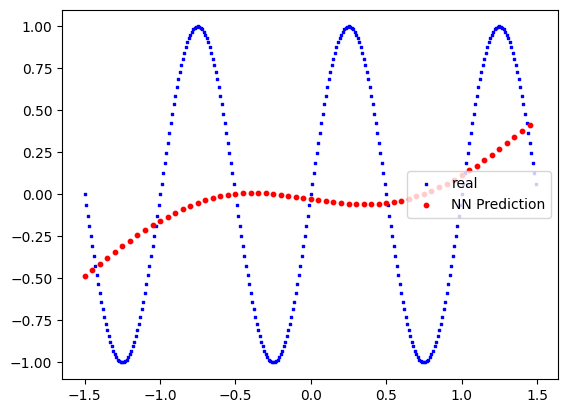

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error
import tensorflow_probability as tfp

class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, hidden_layer_sizes=(4, 8), activation='relu', optimizer='adam', epochs=100):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.optimizer = optimizer
        self.epochs = epochs
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_layer_sizes[0], input_dim=1, activation=self.activation))
        for layer_size in self.hidden_layer_sizes[1:]:
            model.add(Dense(layer_size, activation=self.activation))
        model.add(Dense(1))  # Output layer
        return model

    def fit(self, X, y):
        self.model = self.build_model()

        if self.optimizer == 'adam':
            self.model.compile(optimizer=Adam(), loss='mean_squared_error')
            self.model.fit(X, y, epochs=self.epochs, verbose=0)
        elif self.optimizer == 'lbfgs':
            def loss_fn():
                return MeanSquaredError()(y, self.model(X))

            results = tfp.optimizer.lbfgs_minimize(
                value_and_gradients_function=tfp.math.value_and_gradient(loss_fn),
                initial_position=tf.Variable(self.model.trainable_weights),
                num_correction_pairs=10,
                tolerance=1e-8,
                x_tolerance=0,
                f_relative_tolerance=0,
                maximum_iterations=self.epochs
            )

            # Manually assign the optimized weights back to the model
            self.model.set_weights([w.numpy() for w in results.position])

        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        y_pred = self.predict(X)
        return -mean_squared_error(y, y_pred)

# Sample data
x = np.arange(-1.5, 1.5, 0.01).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(4, 8), (8, 4), (10, 6), (6, 10)],
    'activation': ['tanh', 'relu'],
    'optimizer': ['adam', 'lbfgs']
}

# Initialize the KerasRegressorWrapper
model = KerasRegressorWrapper(epochs=100)  # Reduced epochs for demonstration

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(x, y)

# Display best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

# Predict with the best model
test_x = np.arange(-1.5, 1.5, 0.05).reshape(-1, 1)
test_y = grid_search.predict(test_x)

# Plot results
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x, test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.legend()
plt.show()


### Random Search

Random Search is a hyperparameter optimization technique that selects random combinations of hyperparameters to train the model. Unlike Grid Search, which systematically tries every combination within the hyperparameter space, Random Search randomly samples the space and evaluates sets of hyperparameters from a specified distribution.

- **Efficiency**: Random Search can be more efficient than Grid Search, especially when dealing with a large number of hyperparameters. It has a higher chance of finding a good solution with fewer iterations because it does not waste time evaluating every possible combination.
  
- **Flexibility**: It allows for a broader search range and is not limited to a predefined grid, making it more adaptable to finding optimal hyperparameter values that are not aligned with the grid points.

- **Simplicity**: The implementation of Random Search is straightforward and does not require complex setup, making it accessible for a wide range of optimization problems.

#### Differences Between Random Search and Grid Search:

- **Search Methodology**: Grid Search systematically explores every combination in the grid, leading to exhaustive and sometimes computationally expensive searches. Random Search, in contrast, samples combinations randomly, potentially reducing the search time.
  
- **Performance in High-dimensional Space**: In spaces with a large number of hyperparameters, Grid Search's performance degrades significantly as the number of combinations increases exponentially. Random Search is less affected by the dimensionality of the hyperparameter space.

- **Probability of Finding Optimal Parameters**: While Grid Search guarantees that the optimal parameters within the grid will be found, Random Search does not offer such a guarantee. However, studies have shown that Random Search has a higher efficiency for the computational budget, often finding a close-to-optimal solution with far fewer iterations than Grid Search, particularly in high-dimensional spaces.

#### Procedure

1. **Define the hyperparameter distributions:** Create a dictionary where each key represents a hyperparameter and the value is a probability distribution function (e.g., `np.logspace`) for randomly sampling values during the search.
2. **Create a model:** Instantiate the model you wish to train (e.g., LogisticRegression, Neural Network).
3. **Instantiate the RandomizedSearchCV object:** Provide the model, hyperparameter distributions, and the desired number of iterations (`n_iter`) to the `RandomizedSearchCV` function.
4. **Fit the model:** Apply the `fit` method to the `RandomizedSearchCV` object, passing your training data (features `X` and labels `y`).
5. **Retrieve results:** Access the best hyperparameters using `best_params_` and the best score with `best_score_`.


Best parameters: {'solver': 'lbfgs', 'learning_rate_init': 0.2, 'hidden_layer_sizes': (10, 6), 'activation': 'tanh'}
Best score: 0.34311940009118236


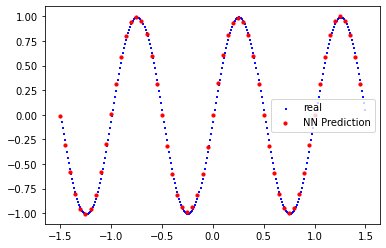

In [4]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-1.5, 1.5, 0.01).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

# Expanded hyperparameter grid for random search
param_distributions = {
    'hidden_layer_sizes': [(4, 8), (8, 4), (10, 6), (6, 10), (50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2]
}

# Create model
nn = MLPRegressor(
    max_iter=5000,
    random_state=9
)

# Perform random search with 20 iterations
random_search = RandomizedSearchCV(nn, param_distributions, n_iter=20, cv=5)
random_search.fit(x, y)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

# Use the best model for prediction
best_model = random_search.best_estimator_
test_x = np.arange(-1.5, 1.5, 0.05).reshape(-1, 1)
test_y = best_model.predict(test_x)

# Plot results
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x, test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.legend()
plt.show()

Fitting 3 folds for each of 30 candidates, totalling 90 fits


0epoch [00:00, ?epoch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

  0%|          | 0.00/30.0 [00:00<?, ?batch/s]

Best parameters: {'optimizer': 'SGD', 'learning_rate': 0.001, 'hidden_layer_sizes': (2, 4), 'activation': 'relu'}
Best score: -0.055344271788075626
2/2 [==============================] - 0s 6ms/step


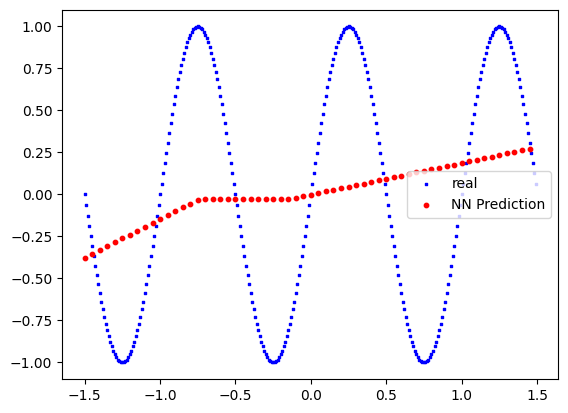

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from tqdm.keras import TqdmCallback

class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, hidden_layer_sizes=(4, 8), activation='relu', optimizer='adam', learning_rate=0.001, epochs=10, batch_size=10):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_layer_sizes[0], input_dim=1, activation=self.activation))
        for layer_size in self.hidden_layer_sizes[1:]:
            model.add(Dense(layer_size, activation=self.activation))
        model.add(Dense(1))  # Output layer

        if self.optimizer == 'adam':
            optimizer = Adam(learning_rate=self.learning_rate)
        else:
            optimizer = self.optimizer  # This assumes 'SGD' or any other string keras optimizers if not 'adam'

        model.compile(loss='mean_squared_error', optimizer=optimizer)
        return model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0, callbacks=[TqdmCallback(verbose=2)])
        return self

    def predict(self, X):
        return self.model.predict(X)

x = np.arange(-1.5, 1.5, 0.01).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

param_distributions = {
    'hidden_layer_sizes': [(4, 0), (2, 4), (4, 8), (8, 4), (10, 6), (6, 10), (12, 8), (8, 12)],
    'activation': ['tanh', 'relu'],
    'optimizer': ['adam', 'SGD'],
    'learning_rate': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
}

model = KerasRegressorWrapper()

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=30, cv=3, n_jobs=-1, verbose=2)
random_search.fit(x, y)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

test_x = np.arange(-1.5, 1.5, 0.05).reshape(-1, 1)
test_y = random_search.predict(test_x)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x, test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.legend()
plt.show()


### Adjusting Hyperparameters Based on Computational Resources

When performing hyperparameter tuning, such as random search or grid search, the choice of hyperparameters like the number of cross-validation folds (`cv`), the number of epochs for training, and the batch size can significantly impact both the performance of your model and the computational resources required.

- **Cross-Validation Folds (`cv`):** Increasing the number of folds in cross-validation (`cv`) generally leads to a more reliable estimation of model performance due to training on multiple train-test splits. However, more folds also mean more training cycles, which can substantially increase computational time and resources needed, especially with large datasets and complex models.

- **Number of Epochs:** The number of epochs determines how many times the learning algorithm will work through the entire training dataset. More epochs can lead to better model performance, as the model has more opportunities to learn and converge to a good set of weights. However, too many epochs can also lead to overfitting and increased training time. It's essential to balance the number of epochs with early stopping criteria to optimize performance without unnecessary computation.

- **Batch Size:** The batch size determines the number of samples that will be propagated through the network in one forward/backward pass. Smaller batch sizes often lead to faster convergence but can be more noisy and less stable. Larger batch sizes provide more stable and accurate gradient estimates but can be slower and require more memory. Depending on your computational resources, you might opt for a larger batch size to make better use of parallel processing capabilities of GPUs, or a smaller batch size if you're limited by memory.

Depending on your available **computational resources** and the **specific requirements** of your problem, you can adjust these parameters to find the right balance between computational efficiency and model performance. For instance, if you have access to powerful computing resources, you might opt for a higher number of `cv` folds, more epochs, and adjust the batch size to fully utilize the available hardware. Conversely, with limited resources, you might choose fewer `cv` folds, fewer epochs, and a smaller batch size to ensure the computations are feasible.

It's always a good practice to start with smaller scale experiments to estimate the time and resources required, and then scale up as needed and as resources allow.


### Using Evolutionary Algorithms for Hyperparameter Optimization (HPO)

Evolutionary Algorithms (EAs) such as Genetic Algorithms (GAs) are inspired by the process of natural selection and genetics. These algorithms are a class of optimization techniques that mimic biological evolution to find optimal solutions in complex search spaces, making them suitable for HPO tasks.

#### How Genetic Algorithms Work:

1. **Initialization:** Begin with a randomly generated population of individuals. Each individual represents a potential solution to the problem, encoded as a chromosome (a string of genes). In the context of HPO, each gene could represent a hyperparameter value.

2. **Evaluation:** Calculate the fitness of each individual in the population. The fitness function assesses how well an individual solves the problem, which, in HPO, could be the performance of a model trained with the hyperparameters represented by the individual.

3. **Selection:** Select individuals to form a new generation. Individuals are chosen based on their fitness, with higher fitness individuals being more likely to be selected. This process mimics natural selection.

4. **Crossover (Recombination):** Combine pairs of individuals (parents) to create offspring for the next generation. Crossover involves swapping parts of the parents' chromosomes, introducing new combinations of genes.

5. **Mutation:** Introduce random changes to the offspring's chromosomes to maintain genetic diversity in the population. This step prevents the algorithm from converging prematurely to suboptimal solutions.

6. **Replacement:** Form a new generation by replacing some or all of the old population with the offspring. The new generation is then used in the next iteration of the algorithm.

7. **Termination:** The algorithm repeats steps 2-6 until a stopping criterion is met, such as reaching a maximum number of generations or achieving a satisfactory fitness level.

#### Genetic Algorithm HPO in Python:

To use a Genetic Algorithm for HPO instead of Randomized Search, you would typically require a GA library or implement the GA steps yourself. Python libraries like `DEAP` (Distributed Evolutionary Algorithms in Python) can be used to implement GAs. The following is a conceptual guide on how to modify the code:

1. **Define the Fitness Function:** The fitness function should train the `MLPRegressor` with a given set of hyperparameters and return a measure of model performance, such as negative mean squared error on a validation set.

2. **Encode Solutions:** Define how to represent hyperparameters as a chromosome. For example, each gene in the chromosome could correspond to a specific hyperparameter (e.g., number of neurons in a layer, activation function type).

3. **Initialize Population:** Create an initial population of chromosomes, each representing a set of hyperparameters.

4. **Implement GA Operations:** Use or implement selection, crossover, and mutation operations to evolve the population over generations.

5. **Integrate with MLPRegressor:** Ensure that each individual's chromosome is decoded into a set of hyperparameters used to configure and train the `MLPRegressor`.


In [8]:
!pip install deap>null

gen	nevals	avg   	min        	max     
0  	5     	0.3201	8.27134e-05	0.554003
1  	2     	7.8024e-05	5.43715e-05	8.92547e-05
2  	2     	7.17265e-05	3.89983e-05	8.27134e-05
3  	4     	5.48073e-05	1.86663e-05	9.26592e-05
4  	2     	3.81018e-05	1.86663e-05	6.74186e-05
5  	4     	5.40137e-05	2.05053e-05	9.79862e-05
6  	4     	7.58954e-05	3.53315e-05	0.000147002
7  	5     	6.25933e-05	1.62323e-05	0.000135039
8  	4     	0.110509   	3.88946e-05	0.552249   
9  	2     	9.26755e-05	3.88946e-05	0.000194805
10 	3     	9.27171e-05	1.77445e-05	0.000264614
11 	4     	4.57646e-05	1.77445e-05	9.65155e-05
12 	4     	5.36872e-05	1.77445e-05	9.47661e-05
13 	2     	4.5421e-05 	1.77445e-05	8.12451e-05
14 	2     	3.16377e-05	1.77445e-05	4.51306e-05
15 	4     	4.18683e-05	1.77445e-05	8.35198e-05
16 	2     	4.6447e-05 	1.77445e-05	0.000111259
17 	1     	3.0057e-05 	1.77445e-05	6.99055e-05
18 	4     	5.53063e-05	1.77445e-05	7.96075e-05
19 	3     	7.78611e-05	3.80075e-05	0.000192031
20 	4     	0.00239111 	3.80075

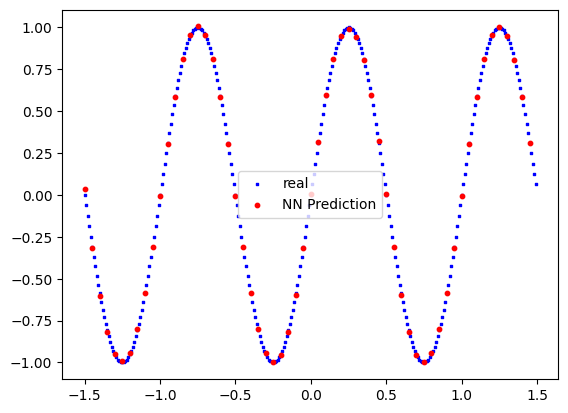

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms
import random

# Problem data
x = np.arange(-1.5, 1.5, 0.01).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

# Hyperparameter space
hidden_layer_sizes = [(4, 8), (8, 4), (10, 6), (6, 10), (50,), (100,), (50, 50), (100, 100)]
activations = ['tanh', 'relu']
solvers = ['lbfgs', 'adam']
learning_rates = [0.001, 0.01, 0.1, 0.2]

# DEAP setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

def create_individual():
    return [
        random.choice(hidden_layer_sizes),
        random.choice(activations),
        random.choice(solvers),
        random.choice(learning_rates)
    ]

def eval_mlp(individual):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = MLPRegressor(hidden_layer_sizes=individual[0],
                         activation=individual[1],
                         solver=individual[2],
                         learning_rate_init=individual[3],
                         max_iter=5000)

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    return (mse,)

def custom_mutate(individual, indpb):
    if random.random() < indpb:
        individual[0] = random.choice(hidden_layer_sizes)

    if random.random() < indpb:
        individual[1] = random.choice(activations)

    if random.random() < indpb:
        individual[2] = random.choice(solvers)

    if random.random() < indpb:
        individual[3] = random.choice(learning_rates)

    return individual,

toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", custom_mutate, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", eval_mlp)

# Genetic Algorithm parameters
population_size = 5
crossover_probability = 0.7
mutation_probability = 0.2
number_of_generations = 30

# Run the Genetic Algorithm
population = toolbox.population(n=population_size)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

algorithms.eaSimple(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability,
                    ngen=number_of_generations, stats=stats, halloffame=hof, verbose=True)

# Display the best individual's hyperparameters and its performance
best_individual = hof.items[0]
print(f"Best Individual: {best_individual}, MSE: {best_individual.fitness.values[0]}")

# Predictions with the best model
test_x = np.arange(-1.5, 1.5, 0.05).reshape(-1, 1)
best_model = MLPRegressor(hidden_layer_sizes=best_individual[0],
                          activation=best_individual[1],
                          solver=best_individual[2],
                          learning_rate_init=best_individual[3],
                          max_iter=5000)
best_model.fit(x, y)
test_y = best_model.predict(test_x)

# Plotting the results
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x, test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.legend()
plt.show()


### Gradient-based Hyperparameter Optimization

1. Gradient-based Hyperparameter Optimization through Reversible Learning https://proceedings.mlr.press/v37/maclaurin15.pdf 
2. Forecasting in Big Data Environments: An Adaptable and Automated Shrinkage Estimation of Neural Networks (AAShNet) https://link.springer.com/article/10.1007/s40953-021-00275-7


Gradient-based hyperparameter optimization is a sophisticated technique for tuning the hyperparameters of a model to enhance performance. This method leverages the gradient of the objective function, often the validation loss, with respect to the hyperparameters to steer the optimization process efficiently.


#### Two-Layer Optimization Framework

The optimization involves two nested loops—inner and outer—reflecting a two-layer structure:

- **Inner Layer (Model Training)**: Optimizes model parameters $\boldsymbol{\theta}$ on the training data to minimize the training loss $\mathcal{L}_{\text{train}}(\boldsymbol{\theta}; \boldsymbol{\lambda})$. This is often achieved using algorithms like stochastic gradient descent (SGD).

    $$\boldsymbol{\theta}^* = \arg\min_{\boldsymbol{\theta}} \mathcal{L}_{\text{train}}(\boldsymbol{\theta}; \boldsymbol{\lambda})$$

- **Outer Layer (Hyperparameter Optimization)**: Adjusts hyperparameters $\boldsymbol{\lambda}$ to minimize the validation loss $\mathcal{L}_{\text{val}}(\boldsymbol{\theta}^*(\boldsymbol{\lambda}), \boldsymbol{\lambda})$, where $\boldsymbol{\theta}^*(\boldsymbol{\lambda})$ denotes the optimal model parameters obtained from the inner layer for a given set of hyperparameters.

    $$\boldsymbol{\lambda}^* = \arg\min_{\boldsymbol{\lambda}} \mathcal{L}_{\text{val}}(\boldsymbol{\theta}^*(\boldsymbol{\lambda}), \boldsymbol{\lambda})$$

#### Linking Hyperparameters to Validation Loss

The key challenge is to compute the gradient of the validation loss with respect to hyperparameters, $\nabla_{\boldsymbol{\lambda}} \mathcal{L}_{\text{val}}$. This involves understanding how changes in $\boldsymbol{\lambda}$ affect $\boldsymbol{\theta}^*$ and, in turn, $\mathcal{L}_{\text{val}}$. For differentiable hyperparameters, this can sometimes be tackled using techniques like implicit differentiation or by employing surrogate models that approximate this relationship.

#### Pseudo Algorithm

1. **Initialize** hyperparameters $\boldsymbol{\lambda}$.
2. **Repeat** for the outer layer until convergence:
    1. **Inner Layer Optimization**: Optimize $\boldsymbol{\theta}$ on the training data.
        - $\boldsymbol{\theta}^* = \arg\min_{\boldsymbol{\theta}} \mathcal{L}_{\text{train}}(\boldsymbol{\theta}; \boldsymbol{\lambda})$
    2. **Compute Validation Loss**: Evaluate $\mathcal{L}_{\text{val}}(\boldsymbol{\theta}^*, \boldsymbol{\lambda})$.
    3. **Estimate Gradient**: Compute or approximate $\nabla_{\boldsymbol{\lambda}} \mathcal{L}_{\text{val}}$.
    4. **Update Hyperparameters**: $\boldsymbol{\lambda} = \boldsymbol{\lambda} - \alpha \nabla_{\boldsymbol{\lambda}} \mathcal{L}_{\text{val}}$, where $\alpha$ is the learning rate for hyperparameters.
3. **Finalize**: Choose $\boldsymbol{\lambda}$ that minimizes $\mathcal{L}_{\text{val}}$.


Gradient-based hyperparameter optimization, especially with a two-layer framework, offers a systematic and theoretically grounded method for model tuning. By exploiting gradient information, it promises more efficient optimization than heuristic methods. The mathematical formulation and algorithmic structure laid out here highlight the method's potential and complexities, including the challenge of computing gradients with respect to hyperparameters.


Hypergrad Python Library
https://github.com/HIPS/hypergrad